In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('cleaned_movie_data.csv')
df = pd.read_csv('full_raw_data_cleaned_movie_data.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,cast,info_json,movie_id,movie_name,summary_wiki
0,0,0,"[{'nm0000209': [' Tim Robbins']}, {'nm0327779'...","{'Title': 'War of the Worlds', 'Year': '2005',...",War of the Worlds,War of the Worlds,Divorced longshoreman Ray Ferrier works at a d...
1,1,1,"[{'nm0914612': [' Emma Watson']}, {'nm0341743'...",{'Title': 'Harry Potter and the Deathly Hallow...,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,The Minister of Magic Rufus Scrimgeour address...
2,2,2,"[{'nm0043173': [' Rick Aviles']}, {'nm0534398'...","{'Title': 'The Stand', 'Year': '1994', 'Rated'...",The Stand,The Stand,"On June 13, at a top-secret government laborat..."
3,3,3,"[{'nm0000295': [' Kate Beckinsale']}, {'nm0640...","{'Title': 'Van Helsing', 'Year': '2004', 'Rate...",Van Helsing,Van Helsing,Monster hunter Gabriel Van Helsing and friar C...
4,5,5,"[{'nm0000349': [' Joan Cusack']}, {'nm0000885'...","{'Title': 'Toy Story 3', 'Year': '2010', 'Rate...",Toy Story 3,Toy Story 3,Andy is preparing to leave for college. He has...
...,...,...,...,...,...,...,...
4950,5958,1836,"[{'nm0662116': [' Cecil Parker']}, {'nm0665327...","{'Title': 'The Court Jester', 'Year': '1955', ...",The Court Jester,The Court Jester,"Set in medieval England, the plot concerns the..."
4951,5959,1839,"[{'nm1869008': [' Anya Engel-Adams']}, {'nm000...","{'Title': 'Chi-Raq', 'Year': '2015', 'Rated': ...",Chi-Raq,Chi-Raq,"In Chicago's Southside, as the events are narr..."
4952,5960,1840,"[{'nm0082848': [' Bindu']}, {'nm2061852': [' A...","{'Title': 'Om Shanti Om', 'Year': '2007', 'Rat...",Om Shanti Om,Om Shanti Om,"In 1977 , Om Prakash Makhija, a junior artist ..."
4953,5961,1841,"[{'nm0772704': [' Kyle Schmid']}, {'nm1169619'...","{'Title': 'The Cheetah Girls', 'Year': '2003',...",The Cheetah Girls,The Cheetah Girls,"Four teen girls in Manhattan—Galleria, Chanel,..."


In [4]:
columns = ['cast', 'info_json']
for c in columns:
    df[c] = [eval(d) for d in df[c]]

# Genre analysis

In [5]:
genres_set = set()
for i in df['info_json']:
    for genre in word_tokenize(i['Genre']):
        if genre!= ',':
            genres_set.add(genre)

In [6]:
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'N/A',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [7]:
for genre in genres_set:
    df[genre] = [0 for _ in range(len(df))]

In [8]:
genre_dict = dict()

for genre in genres_set:
    genre_dict[genre] = [0 for _ in range(len(df))]
    
for i, movie in df.iterrows():
    for genre in word_tokenize(movie['info_json']['Genre']):
        if genre!= ',':
            genre_dict[genre][i] = 1
for genre,value in genre_dict.items():
    df[genre] = value

In [9]:
genre_counts = dict()
for genre in genres_set:
    genre_counts[genre] = df[genre].sum()

Text(0, 0.5, 'y')

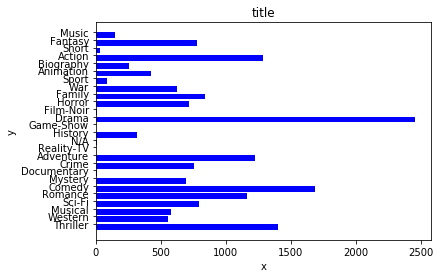

In [10]:
x = genre_counts.keys()
y = genre_counts.values()

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y') 

In [11]:
df.to_csv('genre_movie_data.csv')

In [12]:
list(sorted(genre_counts.items(), key = lambda x: x[1], reverse= True))

[('Drama', 2456),
 ('Comedy', 1690),
 ('Thriller', 1401),
 ('Action', 1286),
 ('Adventure', 1224),
 ('Romance', 1163),
 ('Family', 842),
 ('Sci-Fi', 790),
 ('Fantasy', 778),
 ('Crime', 752),
 ('Horror', 716),
 ('Mystery', 696),
 ('War', 627),
 ('Musical', 577),
 ('Western', 554),
 ('Animation', 425),
 ('History', 314),
 ('Biography', 255),
 ('Music', 146),
 ('Sport', 87),
 ('Short', 31),
 ('Documentary', 9),
 ('Film-Noir', 8),
 ('N/A', 6),
 ('Reality-TV', 3),
 ('Game-Show', 2)]

In [13]:
# removing classes Sport, Short, Documentary, Game-Show, Film-Noir, Reality-TV, N/A
classes = ['Sport', 'Short', 'Documentary', 'Game-Show', 'Film-Noir', 'Reality-TV', 'N/A', 'Music']
for c in classes:
    df = df[df[c] ==0]
df = df.drop(columns=classes)
df

,Unnamed: 0,Unnamed: 0.1,cast,info_json,movie_id,movie_name,summary_wiki,Thriller,Western,Musical,...,Adventure,History,Drama,Horror,Family,War,Animation,Biography,Action,Fantasy
0,0,0,"[{'nm0000209': [' Tim Robbins']}, {'nm0327779'...","{'Title': 'War of the Worlds', 'Year': '2005',...",War of the Worlds,War of the Worlds,Divorced longshoreman Ray Ferrier works at a d...,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,"[{'nm0914612': [' Emma Watson']}, {'nm0341743'...",{'Title': 'Harry Potter and the Deathly Hallow...,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,The Minister of Magic Rufus Scrimgeour address...,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2,2,"[{'nm0043173': [' Rick Aviles']}, {'nm0534398'...","{'Title': 'The Stand', 'Year': '1994', 'Rated'...",The Stand,The Stand,"On June 13, at a top-secret government laborat...",0,0,0,...,1,0,1,1,0,0,0,0,0,1
3,3,3,"[{'nm0000295': [' Kate Beckinsale']}, {'nm0640...","{'Title': 'Van Helsing', 'Year': '2004', 'Rate...",Van Helsing,Van Helsing,Monster hunter Gabriel Van Helsing and friar C...,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,5,5,"[{'nm0000349': [' Joan Cusack']}, {'nm0000885'...","{'Title': 'Toy Story 3', 'Year': '2010', 'Rate...",Toy Story 3,Toy Story 3,Andy is preparing to leave for college. He has...,0,0,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,5955,1833,"[{'nm0528695': [' Jack Lynn']}, {'nm0377931': ...","{'Title': 'Yentl', 'Year': '1983', 'Rated': 'P...",Yentl,Yentl,"Barbra Streisand portrays Yentl Mendel, a girl...",0,0,1,...,0,0,1,0,0,0,0,0,0,0
4950,5958,1836,"[{'nm0662116': [' Cecil Parker']}, {'nm0665327...","{'Title': 'The Court Jester', 'Year': '1955', ...",The Court Jester,The Court Jester,"Set in medieval England, the plot concerns the...",0,0,1,...,1,0,0,0,1,0,0,0,0,0
4951,5959,1839,"[{'nm1869008': [' Anya Engel-Adams']}, {'nm000...","{'Title': 'Chi-Raq', 'Year': '2015', 'Rated': ...",Chi-Raq,Chi-Raq,"In Chicago's Southside, as the events are narr...",0,0,1,...,0,0,1,0,0,0,0,0,0,0
4952,5960,1840,"[{'nm0082848': [' Bindu']}, {'nm2061852': [' A...","{'Title': 'Om Shanti Om', 'Year': '2007', 'Rat...",Om Shanti Om,Om Shanti Om,"In 1977 , Om Prakash Makhija, a junior artist ...",1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [14]:
genre_counts = dict()
for genre in genres_set:
    if genre not in classes:
        genre_counts[genre] = df[genre].sum()

In [15]:
genre_countz = list(sorted(genre_counts.items(), key = lambda x: x[1],))
genre_countz

[('Biography', 229),
 ('History', 303),
 ('Animation', 386),
 ('Musical', 491),
 ('Western', 536),
 ('War', 608),
 ('Mystery', 685),
 ('Horror', 707),
 ('Crime', 725),
 ('Fantasy', 740),
 ('Family', 745),
 ('Sci-Fi', 771),
 ('Romance', 1063),
 ('Adventure', 1176),
 ('Action', 1252),
 ('Thriller', 1376),
 ('Comedy', 1531),
 ('Drama', 2306)]

In [16]:
genre_keys = [x[0] for x in genre_countz]
genre_keys

['Biography',
 'History',
 'Animation',
 'Musical',
 'Western',
 'War',
 'Mystery',
 'Horror',
 'Crime',
 'Fantasy',
 'Family',
 'Sci-Fi',
 'Romance',
 'Adventure',
 'Action',
 'Thriller',
 'Comedy',
 'Drama']

In [17]:
compound_genre_set = set()

for i, movie in df.iterrows():
    compound_genre = ''
    for genre in genre_keys:
        if movie[genre]==1:
            compound_genre+=genre
    compound_genre_set.add(compound_genre)

In [18]:
compound_genre_set

{'MysteryCrimeComedyDrama',
 'MusicalComedy',
 'AnimationFantasySci-FiAdventureActionThrillerComedyDrama',
 'AnimationFantasyFamilySci-FiAdventureActionComedyDrama',
 'HorrorFantasyActionThrillerComedy',
 'WarMysteryHorrorSci-FiAdventureActionThriller',
 'MysterySci-FiActionThriller',
 'Western',
 'MusicalFantasyRomanceComedy',
 'CrimeAdventureDrama',
 'AnimationFantasyFamilyAdventureDrama',
 'WesternRomanceAdventureActionThrillerComedy',
 'HistoryCrimeActionThrillerDrama',
 'MusicalFantasyRomanceDrama',
 'CrimeRomanceActionThrillerDrama',
 'CrimeSci-FiActionThriller',
 'CrimeFantasyActionComedy',
 'BiographyWesternDrama',
 'CrimeFantasyRomanceThrillerDrama',
 'BiographyMysteryHorrorFantasyThrillerDrama',
 'MusicalCrimeComedy',
 'CrimeAdventureActionComedy',
 'AnimationMusicalFamilySci-FiAdventureActionComedy',
 'BiographyHistoryWarCrimeThrillerDrama',
 'WarRomanceAdventureDrama',
 'MusicalHorrorThrillerComedy',
 'Sci-FiRomanceThrillerComedy',
 'FantasySci-FiAdventureComedy',
 'WarAdve

In [19]:
df.to_csv('genre_filtered_movie.csv')

# Actor 

In [20]:
actors = dict()

for cast in df['cast']:
    for l in cast:
        #print(l)
        for v in l.values():
            assert(len(v) ==1)
            actor = v[0][1:]
            if actor not in actors.keys():
                actors[actor] =0
            else:
                actors[actor]+=1

In [21]:
list(sorted(actors.items(), key = lambda x: x[1], reverse= True)) 

[('Samuel L. Jackson', 34),
 ('John Wayne', 33),
 ('Jim Cummings', 31),
 ('Steve Buscemi', 31),
 ('Willem Dafoe', 29),
 ('Woody Harrelson', 29),
 ('Johnny Depp', 29),
 ('Tom Hanks', 28),
 ('Christopher Plummer', 27),
 ('Morgan Freeman', 26),
 ('Nicolas Cage', 26),
 ('Robert De Niro', 26),
 ('Frank Welker', 25),
 ('Laurence Fishburne', 25),
 ('Scarlett Johansson', 25),
 ('Michael Caine', 25),
 ('Tom Cruise', 24),
 ('John Goodman', 24),
 ('Gary Oldman', 24),
 ('Brad Pitt', 24),
 ('Matt Damon', 24),
 ('Liam Neeson', 23),
 ('Bruce Willis', 23),
 ('James Franco', 23),
 ('James Stewart', 23),
 ('Stanley Tucci', 22),
 ('J.K. Simmons', 22),
 ('Harrison Ford', 22),
 ('Mark Strong', 22),
 ('Jude Law', 22),
 ('John Cleese', 22),
 ('Antonio Banderas', 22),
 ('Angelina Jolie', 22),
 ('Ed Harris', 22),
 ('Adam Sandler', 22),
 ('Brian Cox', 22),
 ('Jack Elam', 22),
 ('Ralph Fiennes', 21),
 ('Dwayne Johnson', 21),
 ('Keanu Reeves', 21),
 ('Christian Bale', 21),
 ('Donald Sutherland', 21),
 ('Arnold Sc